In [22]:
pip install -U scikit-learn

  Using cached scikit_learn-1.2.0-cp39-cp39-macosx_10_9_x86_64.whl (9.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3
You should consider upgrading via the '/usr/local/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import sklearn
import scipy
import sys
import os

### **Polynomial Regressor**

Polynomial models are used to map the relationship between independent & dependent variables that have a curvilinear relation. More specifically, it's when the relationship between the variables can be mapped usign a polynomial equation in the n-th degree.


The following are examples of polynomial equations:<br>
- Linear: $ax + b$<br>
- Quadratic: $ax^2 + bx + c$<br>
- Cubic: $ax^3 + bx^2 + cx + d$<br>

The linear equation is one we were able to model with a linear regression model.

The polynomial nature of these equations means we'll be encountering some curves rather than a straight line, which is why we'll need to use a polynomial model to capture this polynomial relation.

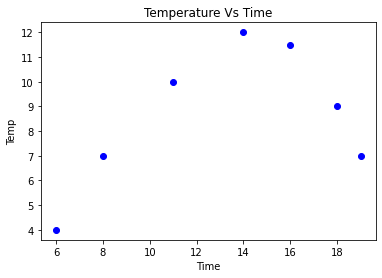

In [18]:
Time = np.array([6, 8, 11, 14, 16, 18, 19])
Temp = np.array([4, 7, 10, 12, 11.5, 9, 7])

# Let's plot those lines
plt.figure()
plt.plot(Time, Temp, 'bo')
plt.xlabel("Time")
plt.ylabel("Temp")
plt.title("Temperature Vs Time")
plt.show();

We can see how these points have a curvilinear pattern. This relationship can be modeled using the following polynomial equation:

$$Temp = B_0 + B_1 * Time + B_2 * Time^2$$

The $B_n$ are the weights/estimators we'll try to find through our model to best represent our data points.

### Numpy approach

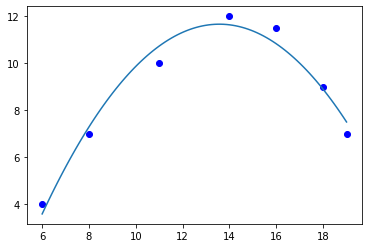

In [19]:
# Let's generate a polynomial equation that fits our data
beta = np.polyfit(Time, Temp, 2)
p = np.poly1d(beta)

xp = np.linspace(6, 19, 100)
plt.figure()
plt.plot(Time, Temp, 'bo', xp, p(xp), '-')
plt.show();

The equation derived with numpy somewhat fits the points but not as good as we'd like it to.

It's important to note that we're not sure what degree our polynomial equation should be, and the higher we go the more accurate our model is, however we still run the risk of making our equation _and thus model_ a bit too complex.

### **Estimating House Prices**

For this problem we'll be using a Decision Tree regressor model on its own & one with the AdaBoost Regressor.

AdaBoost stands for `Adaptive Boosting` which is a method used to boost the accuracy of the results.

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [27]:
# Importing the data
boston_df = pd.read_csv('data_files/Boston_housing.csv', index_col=0)

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [30]:
X = boston_df.drop(['Price'], axis=1)
y = boston_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [34]:
# Building the regressor
dt_regressor = DecisionTreeRegressor(max_depth = 4)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [35]:
ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
n_estimators=400, random_state = 7)
ab_regressor.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=400, random_state=7)

In [38]:
y_pred_dt = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_dt)
evs = explained_variance_score(y_test, y_pred_dt)
print("---- Decision Tree performance ----")
print(f"Mean squared error = {round(mse, 2)}")
print(f'Explained variance score = {round(evs, 2)}')

print()

y_pred_ab = ab_regressor.predict(X_test)
mse_ab = mean_squared_error(y_test, y_pred_ab)
evs_ab = explained_variance_score(y_test, y_pred_ab)
print(" ---- AdaBoost performance ----")
print(f"Mean squared error = {round(mse_ab, 2)}")
print(f'Explained variance score = {round(evs_ab, 2)}')

---- Decision Tree performance ----
Mean squared error = 10.75
Explained variance score = 0.86

 ---- AdaBoost performance ----
Mean squared error = 11.24
Explained variance score = 0.85
